HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socioeconomic and health factors

In [101]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
#Reading Data
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [103]:
data.shape #dimensions of the data

(167, 10)

In [104]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [105]:
data.describe() #basic info of the dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [107]:
data.isna().sum() #print the sum of null values for each columns

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values found in the dataset

# Outlier Analysis¶

Plotting boxplots to see how values in each columns are distributed

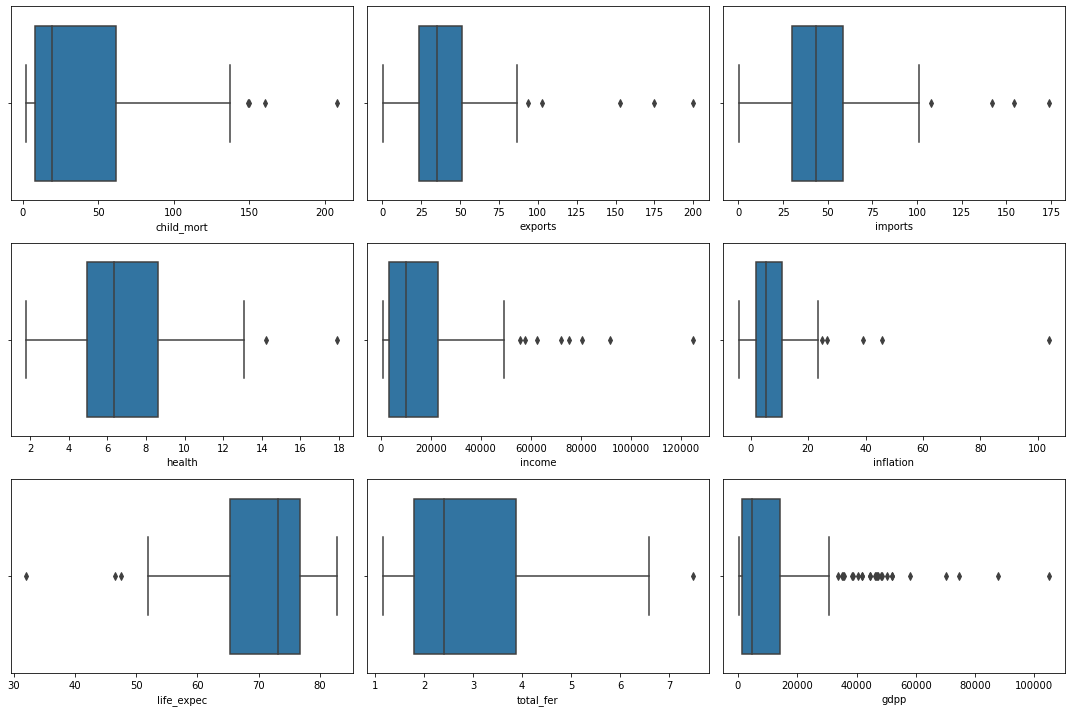

In [108]:
import warnings
warnings.filterwarnings('ignore')


fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt1 = sns.boxplot(data['child_mort'], ax = ax[0,0])
plt2 = sns.boxplot(data['exports'], ax = ax[0,1])
plt3 = sns.boxplot(data['imports'], ax = ax[0,2])
plt4 = sns.boxplot(data['health'], ax = ax[1,0])
plt5 = sns.boxplot(data['income'], ax = ax[1,1])
plt6 = sns.boxplot(data['inflation'], ax = ax[1,2])
plt7 = sns.boxplot(data['life_expec'], ax = ax[2,0])
plt8 = sns.boxplot(data['total_fer'], ax = ax[2,1])
plt9 = sns.boxplot(data['gdpp'], ax = ax[2,2])

plt.tight_layout()

In [109]:
data1 = data.copy()

There are a number of outliers in the data

Keeping in mind we need to identify backward countries based on socio economic and health factors, we will cap the outliers to values accordingly for analysis

In [110]:
def outlier_replace(data, var):
    percentiles = data[var].quantile([0.05, 0.95]).values
    data[var][data[var] <= percentiles[0]] = percentiles[0]
    data[var][data[var] >= percentiles[1]] = percentiles[1]

In [111]:
for x in data1.drop(['country'], axis = 1).columns:
    outlier_replace(data1, x)

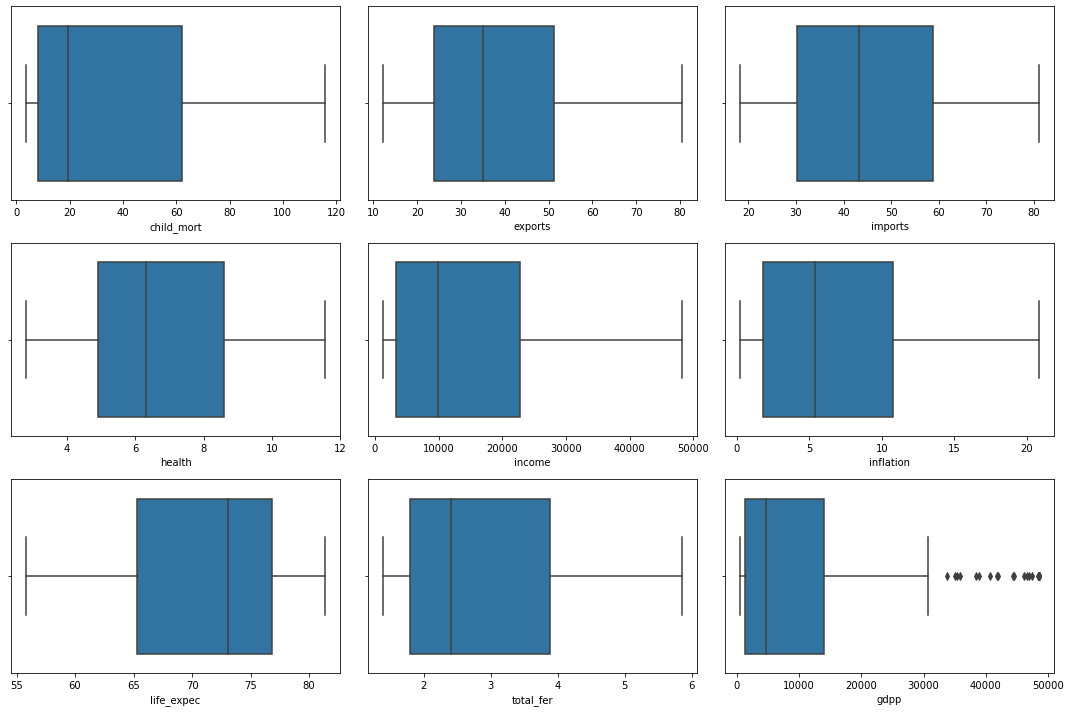

In [112]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt1 = sns.boxplot(data1['child_mort'], ax = ax[0,0])
plt2 = sns.boxplot(data1['exports'], ax = ax[0,1])
plt3 = sns.boxplot(data1['imports'], ax = ax[0,2])
plt4 = sns.boxplot(data1['health'], ax = ax[1,0])
plt5 = sns.boxplot(data1['income'], ax = ax[1,1])
plt6 = sns.boxplot(data1['inflation'], ax = ax[1,2])
plt7 = sns.boxplot(data1['life_expec'], ax = ax[2,0])
plt8 = sns.boxplot(data1['total_fer'], ax = ax[2,1])
plt9 = sns.boxplot(data1['gdpp'], ax = ax[2,2])

plt.tight_layout()

# Scaling 

In [113]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1.iloc[:,1:])

# KMeans Clustering

In [114]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1502.9999999999998, 988.2059630742865, 762.0927916205745, 652.3391888775122, 582.7113787370532, 530.3236771707449, 489.51788710042825, 435.96916857976424, 401.96045141050854, 379.261971988166]


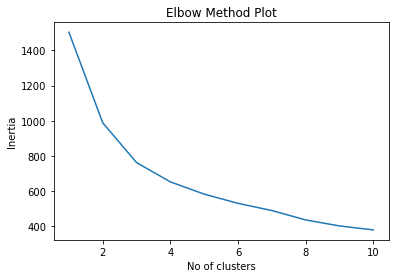

In [115]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [116]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[0 1 1 0 1 1 1 2 2 1 2 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 0 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 0 0 0 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 0 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [117]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


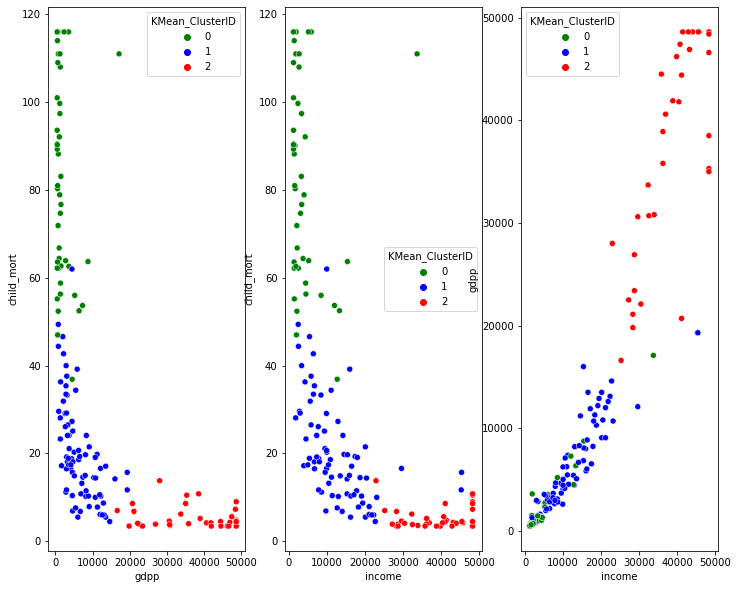

In [118]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'KMean_ClusterID',palette=['green','blue','red'])
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'KMean_ClusterID',palette=['green','blue','red'])
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'KMean_ClusterID',palette=['green','blue','red'])
plt.show()

# Agglomerative Heirarchial Clustering

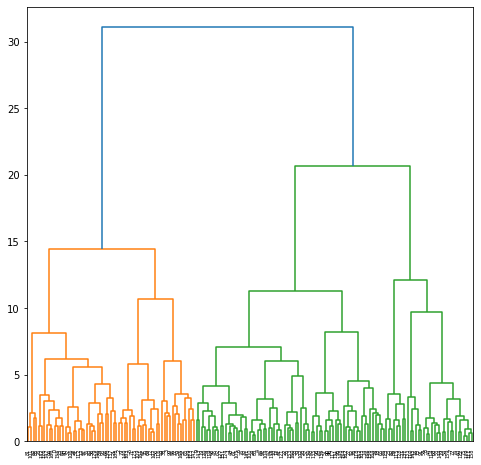

In [119]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward',metric = 'euclidean')
dendrogram(dendro)

plt.show()

From the plot, the optimum no.of clusters = 2

In [122]:
from sklearn.cluster import AgglomerativeClustering as agg

model_hc = agg(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
labels_hc=model_hc.fit_predict(scaled_data)

print(labels_hc)

[1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1]


In [123]:
data1['AHC_ClusterID']= pd.Series(labels_hc)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0,1
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1,0


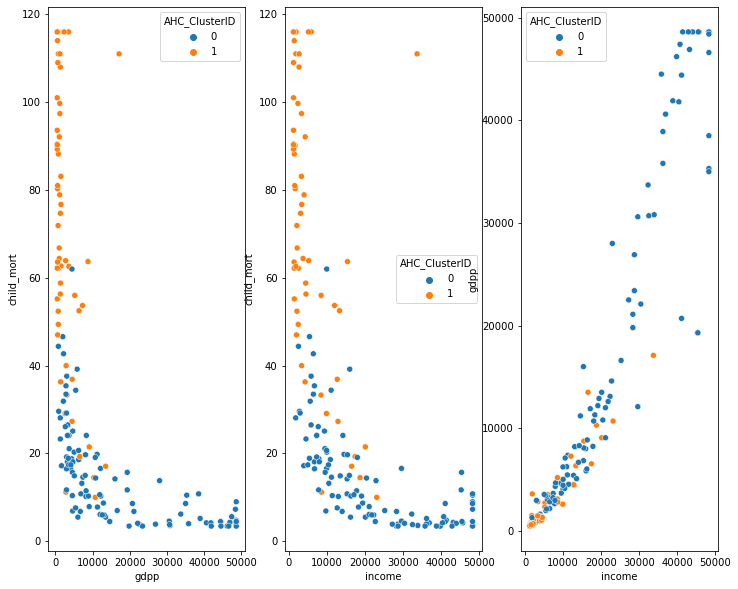

In [124]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'AHC_ClusterID')
plt.show()

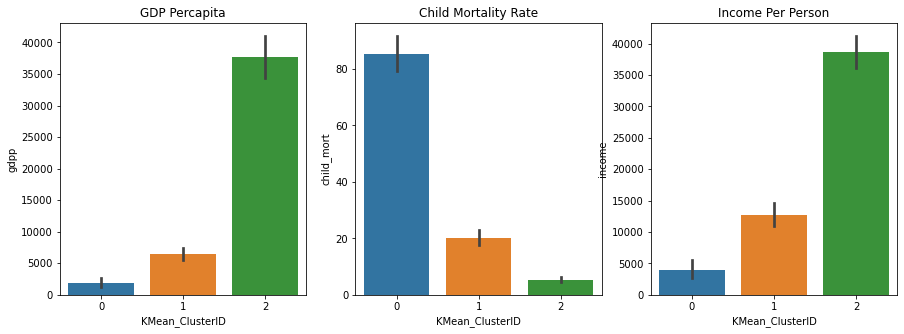

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()


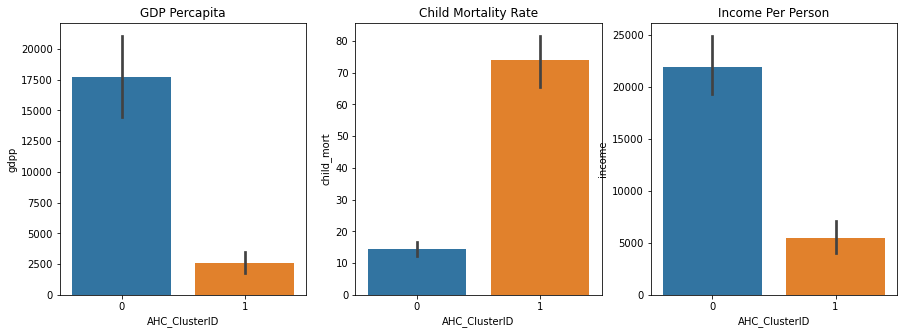

In [126]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'AHC_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'AHC_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'AHC_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()

In [127]:
countries_KMeancluster = data1[data1['KMean_ClusterID']== 1]
countriesKMeancluster  = countries_KMeancluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])

countriesKMeancluster['country'].values

array(['Bangladesh', 'Cambodia', 'Kyrgyz Republic', 'Solomon Islands',
       'Vietnam', 'Uzbekistan', 'Moldova', 'Bolivia', 'Philippines',
       'Bhutan', 'Egypt', 'Mongolia', 'Sri Lanka', 'Morocco', 'Guatemala',
       'Micronesia, Fed. Sts.', 'Georgia', 'Vanuatu', 'Ukraine',
       'El Salvador', 'Guyana', 'Indonesia', 'Armenia', 'Paraguay',
       'Cape Verde', 'Samoa', 'Tonga', 'Fiji', 'Jordan', 'Albania',
       'Tunisia', 'Belize', 'Turkmenistan', 'Algeria', 'Macedonia, FYR',
       'China', 'Bosnia and Herzegovina', 'Ecuador', 'Jamaica', 'Peru',
       'Thailand', 'Serbia', 'Dominican Republic', 'Azerbaijan',
       'Belarus', 'St. Vincent and the Grenadines', 'Colombia', 'Iran',
       'Montenegro', 'Bulgaria', 'Maldives', 'Grenada', 'Mauritius',
       'Panama', 'Costa Rica', 'Romania', 'Suriname', 'Lebanon',
       'Kazakhstan', 'Malaysia', 'Argentina', 'Turkey', 'Russia',
       'Seychelles', 'Brazil', 'Latvia', 'Uruguay', 'Lithuania', 'Libya',
       'Antigua and Barbuda'

AS per KMeans Clustering model the above mentioned are the countries that are in the need of aid.

In [128]:
countries_AHCcluster = data1[data1['AHC_ClusterID']== 1]
countriesAHCcluster  = countries_AHCcluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])

countriesAHCcluster['country'].values

array(['Central African Republic', 'Congo, Dem. Rep.', 'Niger',
       'Mozambique', 'Burundi', 'Malawi', 'Liberia', 'Sierra Leone',
       'Madagascar', 'Eritrea', 'Togo', 'Guinea-Bissau', 'Afghanistan',
       'Gambia', 'Rwanda', 'Burkina Faso', 'Nepal', 'Uganda', 'Guinea',
       'Haiti', 'Tanzania', 'Mali', 'Tajikistan', 'Benin', 'Bangladesh',
       'Comoros', 'Chad', 'Kenya', 'Myanmar', 'Senegal', 'Pakistan',
       'Lao', 'Lesotho', 'Mauritania', "Cote d'Ivoire", 'Cameroon',
       'Ghana', 'Yemen', 'India', 'Uzbekistan', 'Zambia', 'Sudan',
       'Kiribati', 'Nigeria', 'Egypt', 'Congo, Rep.', 'Sri Lanka',
       'Micronesia, Fed. Sts.', 'Indonesia', 'Angola', 'Timor-Leste',
       'Algeria', 'Iraq', 'Namibia', 'Botswana', 'Iran', 'South Africa',
       'Gabon', 'Kazakhstan', 'Argentina', 'Russia', 'Venezuela',
       'Equatorial Guinea'], dtype=object)

AS per Agglomerative Heirarchial Clustering  model the above mentioned are the countries that are in the need of aid.